In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import seaborn as sns
import demoji
nltk.download("stopwords")
nltk.download("punkt")




df = pd.read_csv("C:/ML/python/data/Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv",delimiter=',')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df.isna().sum()

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

In [3]:
df.duplicated().sum()

0

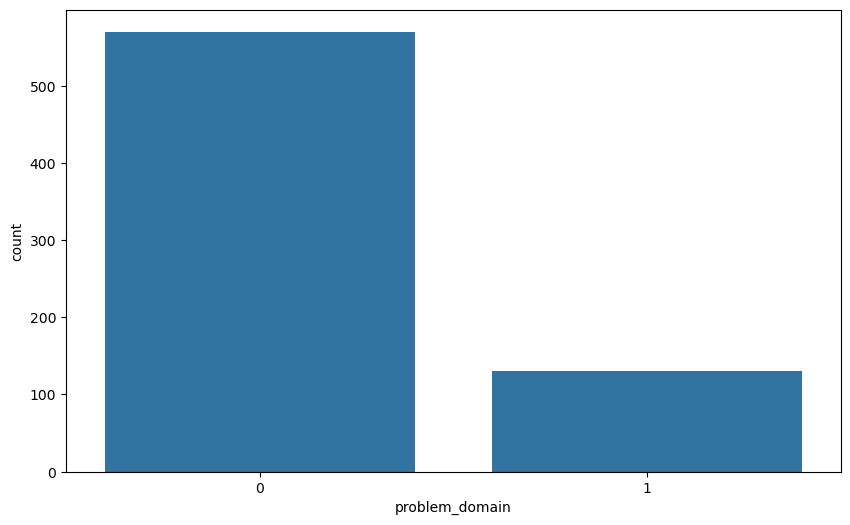

In [4]:
df.drop(['content','Unnamed: 0'],axis=1,inplace=True)


fig,axs = plt.subplots(figsize=(10,6))
sns.countplot(x='problem_domain',data=df)
plt.show()


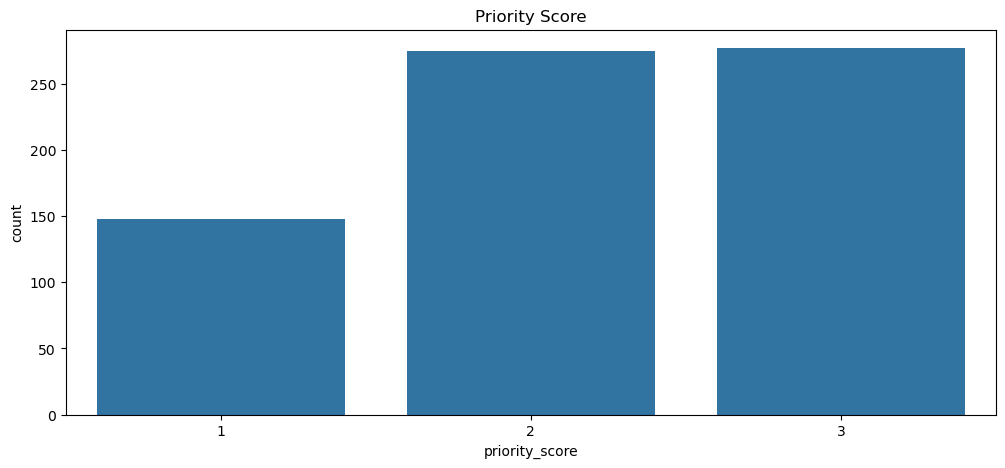

In [5]:
fig2,axs2 = plt.subplots(figsize=(12,5))
sns.countplot(x='priority_score',data=df)
plt.title("Priority Score")
plt.show()


In [6]:
#cleaning txt
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = demoji.replace(text,'')
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub('\d', '',text)
    
    text = re.sub('\n','',text)
    
    text = re.sub('\n\n','',text)
    
    text = re.sub('\w*\d\w*', '', text)
    
    text = re.sub('loading', '',text)
    
    text = re.sub('\b', '',text)


    return text


df['translated_content'] = df['translated_content'].apply(clean_text)
df['translated_content'].head(10)

0    sorry including the expensive price  apk using...
1     after installed the app stuck with white display
2    cannot submit the data verification even my in...
3                              the app keep restarting
4                   overpriced bad food too many flies
5     the chat feature which is important cant be used
6    overpriced at first i think its cheaper than r...
7    its very noisy up there please add the sound r...
8           its not seamless anyway the service is bad
9          come on i have to update the app frequently
Name: translated_content, dtype: object

In [7]:
#Removing Stopwords
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)



df['translated_content'] = df['translated_content'].apply(remove_stopwords)
df['translated_content'].head(10)

0    sorry including expensive price apk using engl...
1                    installed app stuck white display
2    submit data verification even internet stable ...
3                                  app keep restarting
4                       overpriced bad food many flies
5                     chat feature important cant used
6           overpriced first think cheaper refdorz oyo
7                       noisy please add sound reducer
8                          seamless anyway service bad
9                           come update app frequently
Name: translated_content, dtype: object

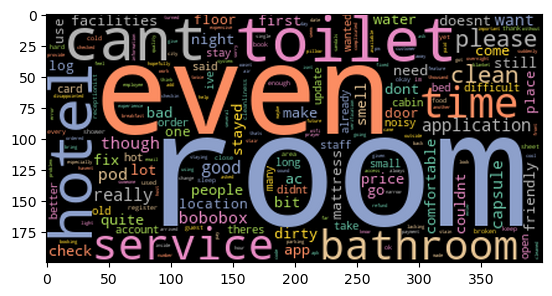

In [8]:
#wordcloud of most used tokens
text = " ".join(i for i in df['translated_content'])


from wordcloud import WordCloud




wc = WordCloud(colormap='Set2',collocations=False).generate(text)
plt.imshow(wc,interpolation='blackman')
plt.show()


In [9]:
#Traing/test split using ML models without keras
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_ = df['translated_content']
X_ = cv.fit_transform(X_).toarray()
y_ = df['problem_domain']



X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=.20,random_state=42)




from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
MNB=  MultinomialNB()
BNB = BernoulliNB()
GNB = GaussianNB()

from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
PA = PassiveAggressiveClassifier()
lr = LogisticRegression()

from sklearn.metrics import classification_report,accuracy_score

def evaluate_regular(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --CLF RPT-- {clf_rpt}')
    return pred


lr_pred = evaluate_regular(X_train, X_test, y_train, y_test, lr)
MNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, MNB)
BNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, BNB)
GNB_pred = evaluate_regular(X_train, X_test, y_train, y_test, GNB)
PA_pred = evaluate_regular(X_train, X_test, y_train, y_test, PA)

LogisticRegression, --ACC-- 85.00%; --CLF RPT--               precision    recall  f1-score   support

           0       0.86      0.96      0.91       112
           1       0.73      0.39      0.51        28

    accuracy                           0.85       140
   macro avg       0.80      0.68      0.71       140
weighted avg       0.84      0.85      0.83       140

MultinomialNB, --ACC-- 86.43%; --CLF RPT--               precision    recall  f1-score   support

           0       0.91      0.92      0.92       112
           1       0.67      0.64      0.65        28

    accuracy                           0.86       140
   macro avg       0.79      0.78      0.79       140
weighted avg       0.86      0.86      0.86       140

BernoulliNB, --ACC-- 70.71%; --CLF RPT--               precision    recall  f1-score   support

           0       0.79      0.87      0.83       112
           1       0.12      0.07      0.09        28

    accuracy                           0.71       

In [10]:
#seperate train/test split for keras tokeinzation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2





X = df['translated_content']
y = df['problem_domain']

#train/test split for LTSM Model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42)


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [11]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print(max_length)



120


In [12]:
#applying padding based on the max sequence length which is 120

from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,120,padding="post")
X_test = pad_sequences(X_test,120,padding="post")

In [14]:
#LTSM model 
RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=150, input_length=120))
RNN.add(SpatialDropout1D(0.3))
RNN.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=l2(0.01))))
RNN.add(Dense(2, activation='sigmoid'))

RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 64


history = RNN.fit(X_train, y_train, batch_size=batch_size, epochs=50, 
                   validation_data=(X_test, y_test))

results = RNN.evaluate(X_test, y_test)
print(results)

print("Max training accuracy: ", max(history.history['accuracy']))
print("Max validation accuracy: ", max(history.history['val_accuracy']))


Epoch 1/50
10/10 [==============================] - 9s 540ms/step - loss: 4.5122 - accuracy: 0.7563 - val_loss: 3.8220 - val_accuracy: 0.7714
Epoch 2/50
10/10 [==============================] - 5s 492ms/step - loss: 3.3565 - accuracy: 0.8218 - val_loss: 2.9127 - val_accuracy: 0.7714
Epoch 3/50
10/10 [==============================] - 5s 512ms/step - loss: 2.5452 - accuracy: 0.8218 - val_loss: 2.2565 - val_accuracy: 0.7714
Epoch 4/50
10/10 [==============================] - 5s 479ms/step - loss: 1.9324 - accuracy: 0.8218 - val_loss: 1.7200 - val_accuracy: 0.7714
Epoch 5/50
10/10 [==============================] - 5s 490ms/step - loss: 1.4815 - accuracy: 0.8218 - val_loss: 1.3608 - val_accuracy: 0.7714
Epoch 6/50
10/10 [==============================] - 5s 510ms/step - loss: 1.1522 - accuracy: 0.8218 - val_loss: 1.0920 - val_accuracy: 0.7714
Epoch 7/50
10/10 [==============================] - 5s 489ms/step - loss: 0.9137 - accuracy: 0.8218 - val_loss: 0.8852 - val_accuracy: 0.7714
Epoch 

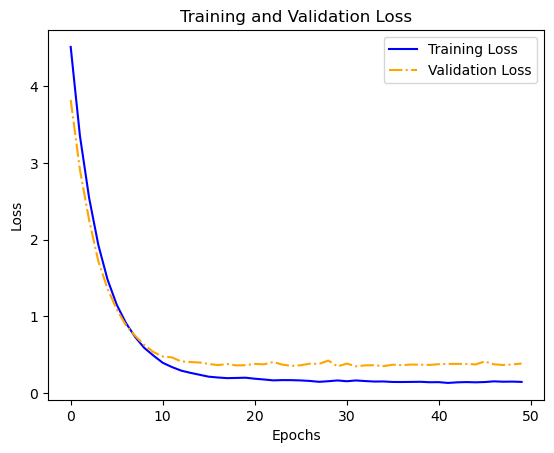

In [15]:
#loss and validation loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


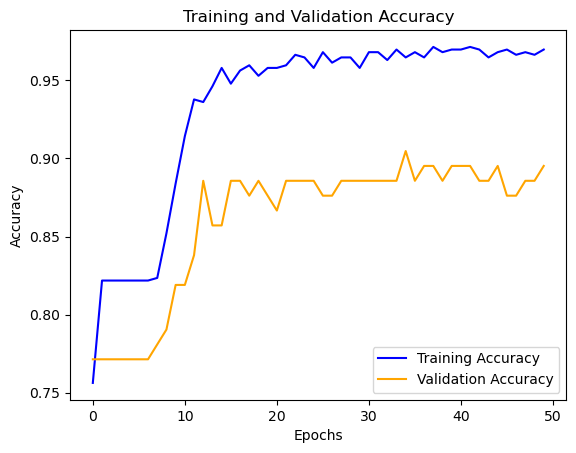

In [16]:
#Accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()